In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('h.jpg', cv2.IMREAD_GRAYSCALE)
# img = cv2.imread('h.jpg', cv2.IMREAD_COLOR)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

grayscale image

In [11]:
img = cv2.imread('h.jpg', cv2.IMREAD_GRAYSCALE)
# img = cv2.imread('h.jpg', cv2.IMREAD_COLOR)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [12]:
def histogram_gray_image(img):
  height, width = img.shape
  # outputImage = np.zeros((height, width))
  outputImage = img.copy()

  freq = np.zeros(256, dtype=np.int32)
  pdf = np.zeros(256, dtype=np.float32)
  cdf = np.zeros(256, dtype=np.float32)

  for row in range(height):
    for col in range(width):
      freq[img[row, col]] += 1
      
  for i in range(256):
    pdf[i] = freq[i] / (height*width)
  
  cdf[0] = pdf[0]
  for i in range(1, 256):
    cdf[i] = cdf[i] + pdf[i]

  for i in range(height):
    for j in range(width):
      outputImage[i, j] = cdf[img[i,j]] * 255

  return outputImage

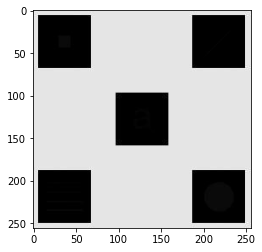

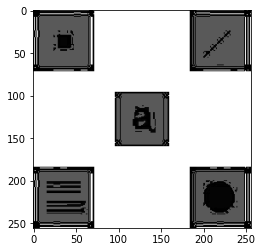

In [13]:
resultImage = histogram_gray_image(img)
plt.imshow(img, cmap='gray')
plt.show()

plt.imshow(resultImage, cmap='gray')
plt.show()


color image

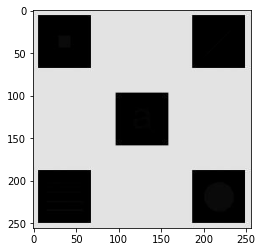

In [14]:
inputImage = cv2.imread('h.jpg')
plt.imshow(inputImage)

# inputImage = inputImage.resize(5,5)
# inputImage.resize((2,4,3))
# print(inputImage.shape)
# print(inputImage)

In [15]:
def histogram_color_image(img):
  height, width, channel = img.shape
  outputImage = img.copy()
  
  freq = np.zeros(256, dtype=np.int32)
  pdf = np.zeros(256, dtype=np.float32)
  cdf = np.zeros(256, dtype=np.float32)

  for row in range(height):
    for col in range(width):
      for ch in range(channel):
        freq[img[row, col, ch]] += 1

  for i in range(256):
    pdf[i] = freq[i] / (height*width*channel)
  
  cdf[0] = pdf[0]
  for i in range(1, 256):
    cdf[i] = cdf[i-1] + pdf[i]

  for i in range(height):
    for j in range(width):
      for k in range(channel):
        outputImage[i, j, k] = cdf[img[i,j,k]] * 255

  return outputImage

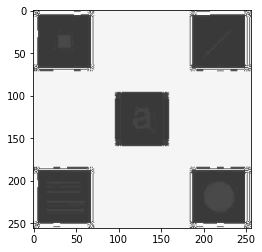

In [16]:
resultImage = histogram_color_image(inputImage)
plt.imshow(resultImage)

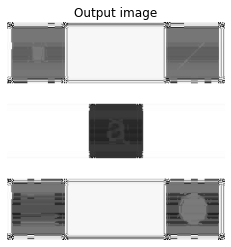

In [17]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 18 05:55:22 2022

@author: Taif
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt

def readImage(dirOfFile):
    img = cv2.imread(dirOfFile)
    return img

def display(img, title = 'Image', cmap_type = 'gray'):
    plt.imshow(img, cmap = cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

def showHistogramOf(img, title = "histogram"):
    plt.hist(img.ravel(), 256, [0, 256])
    plt.title(title)
    plt.show()
    
def saveImage(dir_, img):
    cv2.imwrite(dir_, img)

def wait():
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def histogramEqualizationOf(img):
    n = img.shape[1]
    m = img.shape[2]
    output = img.copy()

    for c in range(img.shape[0]):
        freq = np.zeros(256, int)
        for i in range(n):               # caluculating frequencies of each intensity
            for j in range(m):
                freq[img[c].item(i, j)] += 1
        
        pdf = np.zeros(256, float)
        
        for i in range(256):
            pdf[i] = freq[i] / (n * m)
        
        cdf = np.zeros(256, float)
        cdf[0] = pdf[0]
        for i in range(1, 256):
            cdf[i] = cdf[i - 1] + pdf[i] # calculating sum of p_k for the formula
        
        for i in range(n):
            for j in range(m):
                output[c].itemset((i, j), 255 * cdf[img[c].item(i, j)])
    
    return output

def main():
    input_ = readImage("h.jpg")
    # display(input_, "Input image")
    # showHistogramOf(input_, "Histogram of input image")
    
    output_ = histogramEqualizationOf(input_)
    display(output_, "Output image")
    # showHistogramOf(output_, "Histogram of output image")
    
    saveImage("output.jpg", output_)
    
    wait()
    
main()